In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Linear Regression

**First Step:** Import Packages and Classes

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Second Step:** Import Dataset (downloaded from https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset/version/1#Salary_Data.csv).
x represents years of experience and y represents salary. Then split the dataset into training and testing sets.

In [4]:
dataset = pd.read_csv('gdrive/My Drive/Colab Notebooks/Summer School/linear_regression_dataset.csv')
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


x is needed as a 2d array i.e. as one column and many rows. iloc[:, 0] takes the first column in the csv file which is our x (iloc[row, column] ":" means take all rows and column 0 which is the first). Reshape turns x into 2D. -1 means that it is an unknown dimension and we want numpy to figure it out. By reshaping with (-1, 1), we  have provided column as 1 but rows as unknown . So we get as a result the new shape as (30, 1)

In [5]:
x = dataset.iloc[:, 0].values  # Years of experience
print(x)
x = x.reshape((-1, 1))  # Change x to 2D form
print(x)
print(x.shape)
y = dataset.iloc[:, 1].values    # Salary
print(y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
(30, 1)
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [0]:
# Now split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

**Third Step:** Fit regression model to the training data

Fitting the model on the data will allow it to find the values of the parameters (a and b in y=ax+b) that make up the most suitable equation fitting the training data.

In [7]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Fourth Step:** Check the model performance with known data

The model performance can be observed using  R^2 score with score function. We can also observe the trained model parameters (slope and intercept in linear regression of the trained linear equation) using coef_ and intercept_ methods.

In [8]:
R2 = model.score(x_test,y_test)  
a = model.coef_
b = model.intercept_
print('R2:' + str(R2))
print('Slope a: ' + str(a))
print('Intercept: ' + str(b))

R2:0.9238339486018722
Slope a: [9468.16242907]
Intercept: 24505.161767244863


**Fifth Step:** Predict y on the given x using the trained model

In [9]:
y_predicted = model.predict(x_test)

# Compute MSE 
mse = metrics.mean_squared_error(y_predicted, y_test)
print('MSE: ' + str(mse))

# Compute MAE
mae = metrics.mean_absolute_error(y_predicted, y_test)
print('MAE: ' + str(mae))

MSE: 42811446.81158267
MAE: 5682.406169358087


Visualize the Result. You can try splitting several times and repeating the steps for new splits to visualize better results.

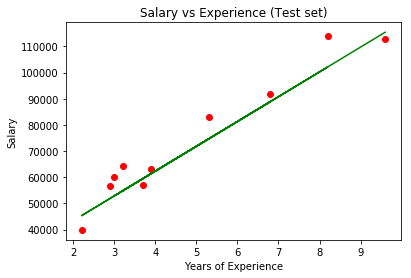

In [10]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, y_predicted, color = "green")
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Load the preprocessed titanic data 

First, we need to import the packages, and then we need to load the clean dataset.

In [0]:
import pandas as pd
import numpy as np

import pickle

# To get the directory 
#import os
#print (os.getcwd())

#To load the clean dataset
with open('gdrive/My Drive/Colab Notebooks/Summer School/clean_dataset.pickle', 'rb') as data:
    df = pickle.load(data)
    

    


Then, we check the data loaded to make sure this is the clean dataset we want to use.

In [14]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,0.2750,1,0,0.027567,2,0
1,1,1,0.4750,1,0,0.271039,0,1
2,3,1,0.3250,0,0,0.030133,2,1
3,1,1,0.4375,1,0,0.201901,2,1
4,3,0,0.4375,0,0,0.030608,2,0


# Train-Test Splitting

Next, we check whether the label or variable of our interest is categorized. In our case "Survived" is labelled as "0" or "1". so we don't need to transform it. 

Then we split the data into training and testing.
Note that we are selecting all columns except the last one for X and the last column for Y (using -1 as an index means that we are taking the first from the other side i.e. the last column here)

In [15]:
#Split the data into train/test
X = df.iloc[:,0:-1].values
Y = df.iloc[:,-1].values
print(X)
print(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

print ('X_test shape: ',X_test.shape)
print ('X_train shape: ',X_train.shape)
print ('Y_test shape: ',Y_test.shape)
print ('X_train shape: ',Y_train.shape)



[[3.         0.         0.275      ... 0.         0.02756654 2.        ]
 [1.         1.         0.475      ... 0.         0.27103916 0.        ]
 [3.         1.         0.325      ... 0.         0.03013308 2.        ]
 ...
 [3.         0.         0.48125    ... 0.         0.02756654 2.        ]
 [3.         0.         0.37351422 ... 0.         0.03060837 2.        ]
 [3.         0.         0.37351422 ... 1.         0.08501255 0.        ]]
[0 1 1 ... 0 0 0]
X_test shape:  (261, 7)
X_train shape:  (1042, 7)
Y_test shape:  (261,)
X_train shape:  (1042,)


# Decision Tree


## Decision Tree model

In [16]:
###### IMPORT MODULES #######

from sklearn.tree import DecisionTreeClassifier

#### CREATE MODEL ####
# The criterion can be chosen to be gini for Gini index, entropy for info gain.

clf = DecisionTreeClassifier()

#### FIT MODEL ####
dt_model = clf.fit(X_train, Y_train)
print(dt_model)




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


## Testing and Score Metrics

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#### TEST model ####
## Predict the label variable.
Y_dt_predicted = dt_model.predict(X_test)


## Accuracy score
print ("Accuracy score = ",accuracy_score(Y_test, Y_dt_predicted)*100, '%')

## F1-Score One can choose the average to be macro, micro or weighted.
print ("F1-score = ",f1_score(Y_test, Y_dt_predicted, average='macro')*100, '%')



Accuracy score =  78.9272030651341 %
F1-score =  77.4876499647142 %


## Decision Tree graph for titanic preprocessed dataset 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


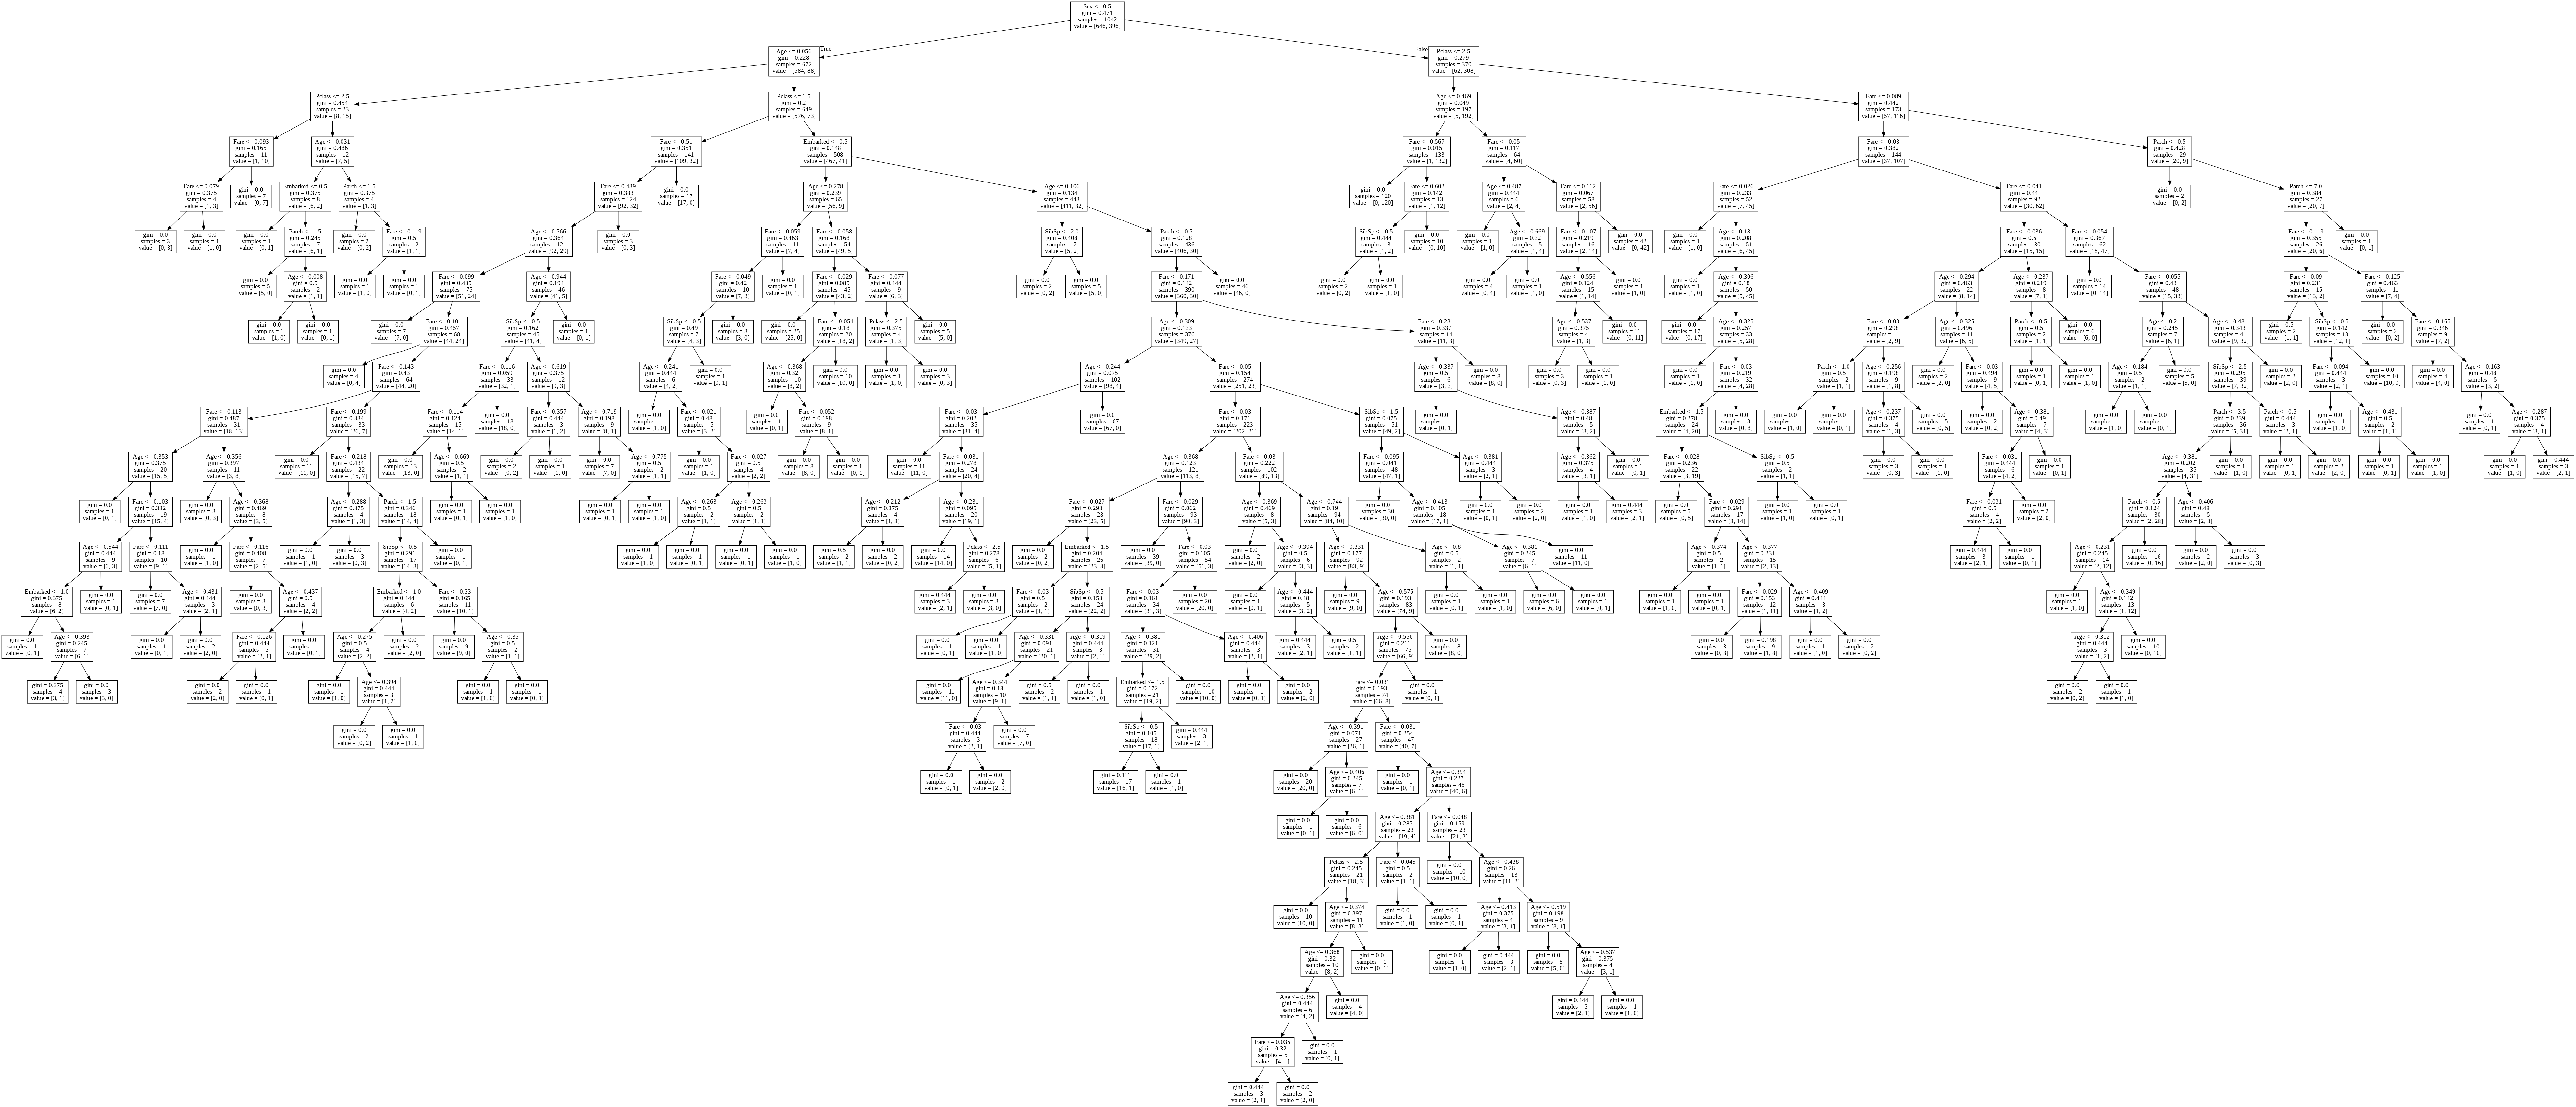

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
import pydotplus

dot_data = StringIO()
export_graphviz(clf,feature_names=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"],out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("titanic_dt.png")
Image(graph.create_png())

# Support Vector Machine (SVM)

## Linear SVM

### Linear SVM model

In [18]:
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(X_train,Y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### Testing and Score Metrics

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

predicted_Y = clf.predict(X_test)
F_measure = f1_score(Y_test, predicted_Y, average='micro')
print('F_measure:',F_measure*100,'%')

F_measure: 85.82375478927203 %


### Linear SVM graph 

Before, we were providing the SVM with 7 features (age, fare ...). So, let us say we want to plot the points (passengers we have) and take an axis for each feature. This will give us a 7D plot that we can't visualize. However, you can imagine that the SVM is making a linear separation among those 7 features as if in 7D, and it was working fine (about 85% accuracy). 
Now, we will try giving the SVM only two features that are Age and Fare. This SVM will try to separate the data (survived or not) according to these two features only; so it'll be in 2D and we will plot it below. If you recall from the first workshop, we visualized the data according to Age and Fare and separated their colors according to survived or not, and we found that they cannot be separated by a straight line as you will see again below. This means that the linear SVM will not be able to do a good separation in case we give it only Age and Fare, hence giving much lower accuracy as you will see after running the code below (about 65% accuracy).
This emphasizes more that visualizing the data before can help us in determining the right model to use. For example, if our data only includes Age and Fare and we see that they are inseperable, we'll decide not to choose SVM as our model since we'll know it won't work well with the data we have.

Note here that we did not split the data into training and testing sets just to show the concept above more clearly. However, this also shows that even though we're testing the same data trained on, the accuracy couldn't get better since the data is inseparable.

F_measure for SVM classifier with linear Kernel: 64.62010744435918 %


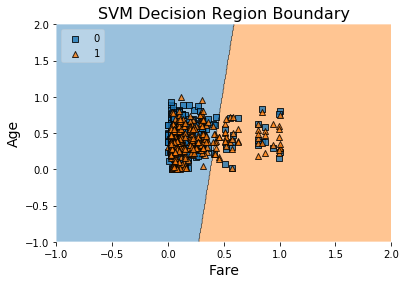

In [30]:
from mlxtend.plotting import plot_decision_regions

X = df[['Fare' ,'Age']]

y = df['Survived']

value=1.5
width=0.75

clf = svm.SVC(decision_function_shape='ovo',kernel='linear')
trial_model=clf.fit(X,y)

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf,
                     legend =2) 

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.title('SVM Decision Region Boundary', size=16)

# print(X)
predicted_Y_h_poly = trial_model.predict(X)
F_measure_hard_poly = f1_score(y, predicted_Y_h_poly, average='micro')
print('F_measure for SVM classifier with linear Kernel:',F_measure_hard_poly*100, '%')

Next, we will create a random dataset that is separable to visualize how the SVM will separate them. Note that the accuracy is 100% since we are testing on the same trained data (which as we said before is not good to properly evaluate our model), and since we have very few simple samples.

F_measure for SVM classifier with linear Kernel: 100.0 %


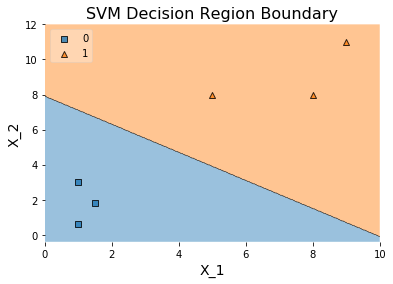

In [32]:
#Let's create a random dataset to see SVM being able to separate the features

# Create arbitrary dataset for example
dff = pd.DataFrame({'X_1': np.array([1, 5, 1.5, 8, 1, 9]),
                   'X_2': np.array([3, 8, 1.8, 8, 0.6, 11]),
                   'y': np.array([0,1,0,1,0,1])})

#Fit Support Vector Machine Classifier
X = dff[['X_1', 'X_2']]
y = dff['y']

clf = svm.SVC(decision_function_shape='ovo',kernel='linear')
new = clf.fit(X.values, y.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

predicted_Y_h_poly = new.predict(X)
F_measure_hard_poly = f1_score(y, predicted_Y_h_poly, average='micro')
print('F_measure for SVM classifier with linear Kernel:',F_measure_hard_poly*100, '%')

## Non-linear SVM

### Non-Linear SVM model 

In [41]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc_model = svc.fit(X_train,Y_train)

print('Support vectors:', svc.support_vectors_)

predicted_Y_h_poly = svc_model.predict(X_test)

F_measure_hard_poly = f1_score(Y_test, predicted_Y_h_poly, average='micro')
print('F_measure for SVM classifier with non-linear Kernel:',F_measure_hard_poly*100, '%')

#from sklearn.model_selection import GridSearchCV
#gamma = [0.1,1,10,20,40]
#degree  = [2,3]
#parameters = {'kernel': ['poly'], 'C' : [1000] , 'gamma' : gamma ,'degree' : degree  }

# gridsearch The traditional way of performing hyperparameter optimization has been grid search, 
# or a parameter sweep, which is simply an exhaustive searching through a manually specified subset 
# of the hyperparameter space of a learning algorithm.  (Wikipedia)
# grid_search_cv= GridSearchCV(svc, parameters)
# grid_search_cv.fit(X_train,Y_train)
# It takes so much time so we won't use it for now

Support vectors: [[3.         0.         0.325      ... 0.         0.02995894 1.        ]
 [3.         1.         0.37351422 ... 2.         0.0891635  2.        ]
 [1.         0.         0.37351422 ... 0.         0.15057034 0.        ]
 ...
 [1.         0.         0.325      ... 0.         0.11406844 0.        ]
 [1.         1.         0.4125     ... 0.         0.34220532 1.        ]
 [1.         1.         0.325      ... 0.         0.520073   0.        ]]
F_measure for SVM classifier with non-linear Kernel: 86.20689655172413 %


### Non-Linear SVM graph 

Here, we repeat the same concept we applied in linear SVM when we took Age and Fare only, and we will see that even the non-linear SVM can't separate the data since they are inseparable (linearly and non-linearly).

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


F_measure for SVM classifier with non-linear Kernel: 63.238679969301614 %


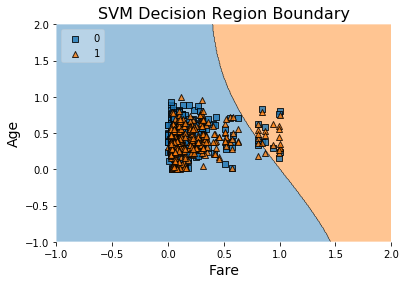

In [42]:
from mlxtend.plotting import plot_decision_regions

X = df[['Fare' ,'Age']]

y = df['Survived']

value=1.5
width=0.75

clf = svm.SVC(decision_function_shape='ovo',kernel='poly')
trial_model=clf.fit(X,y)
# X=X.iloc[:,0:7]
# print(X)
# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf,
                     legend =2) 

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.title('SVM Decision Region Boundary', size=16)

# print(X)
predicted_Y_h_poly = trial_model.predict(X)
F_measure_hard_poly = f1_score(y, predicted_Y_h_poly, average='micro')
print('F_measure for SVM classifier with non-linear Kernel:',F_measure_hard_poly*100, '%')

In the example below, we also created random data to visualize non-linear SVM better. We can see that in this case, if a linear SVM was used, the triangle to the left near the squares might have been grouped with the squares giving an error since we can't draw one straight line that'll separate the triangles and squares completely. Here is where the non-linear SVM performs better since it was able to separate the traingles and squares non-linearly.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


F_measure for SVM classifier with non-linear Kernel: 100.0 %


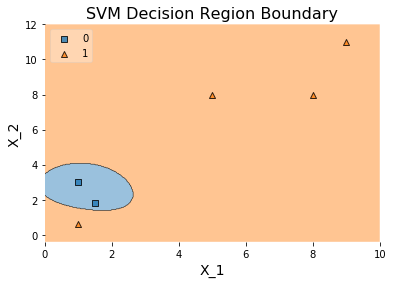

In [43]:
#Let's create a random dataset to see SVM being able to separate the features

# Create arbitrary dataset for example
dff = pd.DataFrame({'X_1': np.array([1, 5, 1.5, 8, 1, 9]),
                   'X_2': np.array([3, 8, 1.8, 8, 0.6, 11]),
                   'y': np.array([0,1,0,1,1,1])})

#Fit Support Vector Machine Classifier
X = dff[['X_1', 'X_2']]
y = dff['y']

clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')
new = clf.fit(X.values, y.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

predicted_Y_h_poly = new.predict(X)
F_measure_hard_poly = f1_score(y, predicted_Y_h_poly, average='micro')
print('F_measure for SVM classifier with non-linear Kernel:',F_measure_hard_poly*100, '%')

#K-Nearest Neighbors (KNN)

## KNN Model 

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn_model = knn.fit(X_train,Y_train)

predicted_Y = knn_model.predict(X_test)


## Testing and Evaluation Metrics 

In [45]:
F_measure_knn = f1_score(Y_test, predicted_Y, average='micro')
print('F_measure for KNN:',F_measure_knn*100, '%')


# view the complete results
#grid_search_cv.best_scores_
print('Accuracy =',knn.score(X_test,Y_test)*100,'%')


F_measure for KNN: 84.29118773946361 %
Accuracy = 84.2911877394636 %
